<a href="https://colab.research.google.com/github/AndrewCrossman/PHYS646/blob/main/Find_Planck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pylab as plt
from scipy.stats import linregress
from scipy import optimize
from google.colab import files
%pylab inline
#plt.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
di = .005
v435 = [-1.174, -1.171, -1.168, -1.165, -1.162, -1.159, -1.156]
i435 = [-.133, -.075, .001, .065, .129, .199, .273]
i435err = [di for x in range(len(i435))]

In [4]:
v254 = [-1.120, -1.450, -1, -.8, -.5]
i254 = [.001, -.005, .007, .016, .038]
i254err = [.003, .004, .003, .003, .005]

In [5]:
v405 = [-1.383, -1.387, -1.380, -1.377, -1.374]
i405 = [-.02, -.19, .13, .28, .40]
i405err = [.02, .02, .02, .01, .02]

In [6]:
v577 = [-.683, -.686, -.680, -.677, -.674]
i577 = [.001, -.125, .145, .262, .392]
i577err = [.005, .010, .010, .005, .005]

In [7]:
v365 = [-1.620, -1.623, -1.617, -1.614, -1.611]
i365 = [.005, -.205, .24, .47, .775]
i365err = [.015, .01, .03, .02, .015]

In [8]:
v546 = [-.773, -.776, -.770, -.767, -.764]
i546 = [.03, -.18, .23, .449, .675]
i546err = [.02, .02, .01, .005, .005]

In [9]:
x = v254
y = i254
yerr = i254err

In [10]:
A = np.vander(x, 2) #alternative to np.c_, same difference, but note the order of the columns
ATA = np.dot(A.T, A / np.power(yerr,2)[:, None])
cov = np.linalg.inv(ATA) #covariance will give us the errors
w = np.linalg.solve(ATA, np.dot(A.T, y / np.power(yerr,2)))

In [11]:
# x-value where y=0, error in slope, error in intercept, overall error in x-value
-w[1]/w[0], np.sqrt(cov[0, 0]), np.sqrt(cov[1, 1]), -w[1]/w[0]*( (cov[0, 0]/w[0]**2)+(cov[1, 1]/w[1]**2) )**(1/2)

(-1.2046386576190713,
 0.005902879633060681,
 0.006084111056328384,
 -0.2172887072966723)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

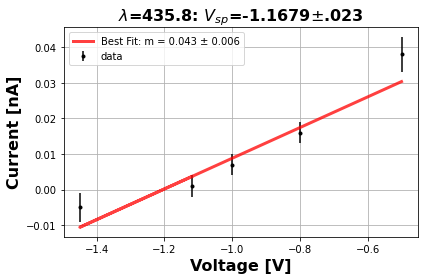

In [12]:
fig, ax = plt.subplots(figsize=(6,4))
ax.errorbar(x,y,yerr=yerr, fmt=".k", label="data")
ax.plot(x, np.multiply(w[0],x)+w[1], "r", 
         alpha=0.75, lw=3, label="Best Fit: m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
ax.set_title(r'$\lambda$=435.8: $V_{sp}$=-1.1679$\pm$.023', fontsize=16, fontweight='bold')
ax.set_xlabel('Voltage [V]', fontsize=16, fontweight='bold')
ax.set_ylabel(r'Current [nA]', fontsize=16, fontweight='bold')
#ax.set_xlim(.9,2.9)
#ax.set_ylim(3,10)
ax.legend()
ax.grid()
plt.tight_layout()
plt.savefig('1.png')
files.download('1.png')

In [13]:
wave = [435.8, 254.7, 404.7, 577.0, 365.0, 546.1]
vsp = [-1.1679, -1.2046, -1.3828, -.6831, -1.6203, -.7732]
vsperr = [.0230, .2173, .0756, .0147, .0397, .0178]
wave = [(299792458*10**9*10**(-15))/x for x in wave]

In [14]:
A1 = np.vander(wave, 2) #alternative to np.c_, same difference, but note the order of the columns
ATA1 = np.dot(A1.T, A1 / np.power(vsperr,2)[:, None])
cov1 = np.linalg.inv(ATA1) #covariance will give us the errors
w1 = np.linalg.solve(ATA1, np.dot(A1.T, vsp / np.power(vsperr,2)))

In [15]:
wave1 = [435.8, 404.7, 577.0, 365.0, 546.1]
vsp1 = [-1.1679, -1.3828, -.6831, -1.6203, -.7732]
vsperr1 = [.0230, .0756, .0147, .0397, .0178]
wave1 = [(299792458*10**9*10**(-15))/x for x in wave1]

In [16]:
A2 = np.vander(wave1, 2) #alternative to np.c_, same difference, but note the order of the columns
ATA2 = np.dot(A2.T, A2 / np.power(vsperr1,2)[:, None])
cov2 = np.linalg.inv(ATA2) #covariance will give us the errors
w2 = np.linalg.solve(ATA2, np.dot(A2.T, vsp1 / np.power(vsperr1,2)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

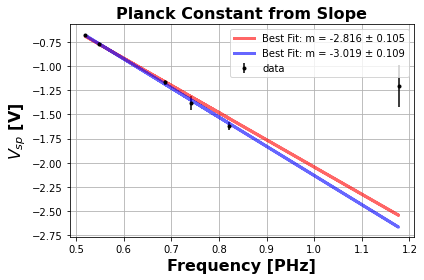

In [17]:
fig1, ax1 = plt.subplots(figsize=(6,4))
ax1.errorbar(wave,vsp,yerr=vsperr, fmt=".k", label="data")
ax1.plot(wave, np.multiply(w1[0],wave)+w1[1], "r", 
         alpha=0.6, lw=3, label="Best Fit: m = {0:.3f} ± {1:.3f}".format(w1[0], np.sqrt(cov1[0, 0])))
ax1.plot(wave, np.multiply(w2[0],wave)+w2[1], "b", 
         alpha=0.6, lw=3, label="Best Fit: m = {0:.3f} ± {1:.3f}".format(w2[0], np.sqrt(cov2[0, 0])))
ax1.set_title(r'Planck Constant from Slope', fontsize=16, fontweight='bold')
ax1.set_xlabel('Frequency [PHz]', fontsize=16, fontweight='bold')
ax1.set_ylabel(r'$V_{sp}$ [V]', fontsize=16, fontweight='bold')
ax1.legend()
ax1.grid()
plt.tight_layout()
plt.savefig('VvsF.png')
files.download('VvsF.png')

In [18]:
"Planck's Constant is e^-*slope = {0:.5f} ± {1:.5f}".format(w1[0]*10**-15*1.602*10**-19*10**34, np.sqrt(cov1[0, 0])*10**-15*1.6*10**-19*10**34)

"Planck's Constant is e^-*slope = -4.51195 ± 0.16778"

In [19]:
"Planck's Constant is e^-*slope = {0:.5f}± {1:.5f}".format(w2[0]*10**-15*1.602*10**-19*10**34, np.sqrt(cov2[0, 0])*10**-15*1.6*10**-19*10**34)

"Planck's Constant is e^-*slope = -4.83646± 0.17517"

# Experiment Two

In [20]:
ND1V = [-1.311, -1.314, -1.308, -1.305, -1.302]
ND1I = [.02, -.09, .14, .259, .345]
ND1Ierr = [.03, .03, .03, .02, .03]

ND6V = [-1.364, -1.367, -1.361, -1.358, -1.355]
ND6I = [.01, -.26, .435, .845, 1.18]
ND6Ierr = [.02, .04 ,.03 ,.02, .02]

ND3V = [-1.419, -1.422, -1.416, -1.413, -1.410]
ND3I = [.08, -.94, .75, 1.58, 2.23]
ND3Ierr = [.05, .03, .03, .04, .05]

ND2V = [-1.172, -1.175, -1.166, -1.163, -1.160]
ND2I = [-.001, -.012, .009, .012, .018]
ND2Ierr = [.002, .003, .004, .005, .005]

In [21]:
x1 = ND1V
y1 = ND1I
y1err = ND1Ierr

A3 = np.vander(x1, 2) #alternative to np.c_, same difference, but note the order of the columns
ATA3 = np.dot(A3.T, A3 / np.power(y1err,2)[:, None])
cov3 = np.linalg.inv(ATA3) #covariance will give us the errors
w3 = np.linalg.solve(ATA3, np.dot(A3.T, y1 / np.power(y1err,2)))

In [22]:
# x-value where y=0, error in slope, error in intercept, overall error in x-value
-w3[1]/w3[0], np.sqrt(cov3[0, 0]), np.sqrt(cov3[1, 1]), -w3[1]/w3[0]*( (cov3[0, 0]/w3[0]**2)+(cov3[1, 1]/w3[1]**2) )**(1/2)

(-1.311671910476863,
 3.015113445758299,
 3.9419775839707603,
 -0.14942321853752133)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

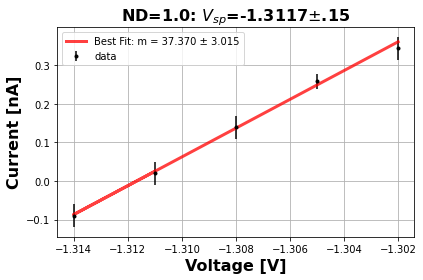

In [23]:
fig2, ax2 = plt.subplots(figsize=(6,4))
ax2.errorbar(x1,y1,yerr=y1err, fmt=".k", label="data")
ax2.plot(x1, np.multiply(w3[0],x1)+w3[1], "r", 
         alpha=0.75, lw=3, label="Best Fit: m = {0:.3f} ± {1:.3f}".format(w3[0], np.sqrt(cov3[0, 0])))
ax2.set_title(r'ND=1.0: $V_{sp}$=-1.3117$\pm$.15', fontsize=16, fontweight='bold')
ax2.set_xlabel('Voltage [V]', fontsize=16, fontweight='bold')
ax2.set_ylabel(r'Current [nA]', fontsize=16, fontweight='bold')
#ax.set_xlim(.9,2.9)
#ax.set_ylim(3,10)
ax2.legend()
ax2.grid()
plt.tight_layout()
plt.savefig('2.png')
files.download('2.png')

In [24]:
NDs = [2, 1, .6, .3]
Vs = [-1.1704,-1.3120, -1.3643, -1.4187]
Vserr = [.027, .15, .04, .03]

In [25]:
A4 = np.vander(NDs, 2) #alternative to np.c_, same difference, but note the order of the columns
ATA4 = np.dot(A4.T, A4 / np.power(Vserr,2)[:, None])
cov4 = np.linalg.inv(ATA4) #covariance will give us the errors
w4 = np.linalg.solve(ATA4, np.dot(A4.T, Vs / np.power(Vserr,2)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

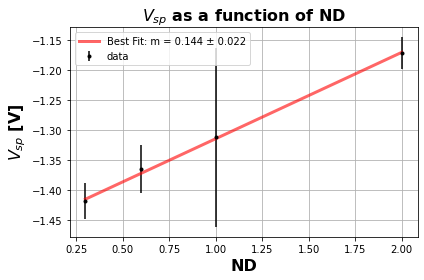

In [26]:
fig3, ax3 = plt.subplots(figsize=(6,4))
ax3.errorbar(NDs,Vs,yerr=Vserr, fmt=".k", label="data")
ax3.plot(NDs, np.multiply(w4[0],NDs)+w4[1], "r", 
         alpha=0.6, lw=3, label="Best Fit: m = {0:.3f} ± {1:.3f}".format(w4[0], np.sqrt(cov4[0, 0])))
ax3.set_title(r'$V_{sp}$ as a function of ND', fontsize=16, fontweight='bold')
ax3.set_xlabel('ND', fontsize=16, fontweight='bold')
ax3.set_ylabel(r'$V_{sp}$ [V]', fontsize=16, fontweight='bold')
ax3.legend()
ax3.grid()
plt.tight_layout()
plt.savefig('ODvsF.png')
files.download('ODvsF.png')